In [2]:
import cifar10

In [3]:
cifar10.data_path="data/CIFAR_10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
cifar10.load_class_names()

Loading data: data/CIFAR_10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
Xt=cifar10.load_training_data()

Loading data: data/CIFAR_10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR_10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR_10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR_10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR_10/cifar-10-batches-py/data_batch_5


In [6]:
cifar10.img_size

32

In [7]:
cifar10.img_size_flat

3072

In [8]:
cifar10.one_hot_encoded

<function dataset.one_hot_encoded>

In [9]:
import matplotlib.pyplot as plt

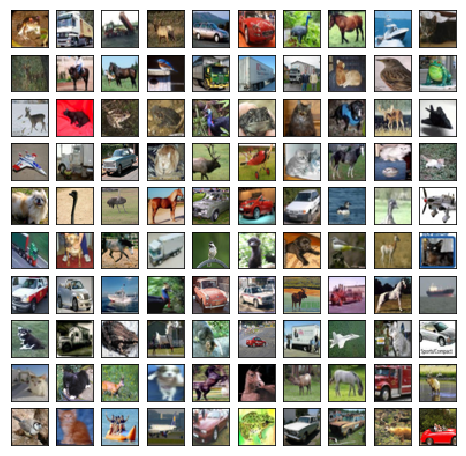

In [10]:
fig=plt.figure(figsize=(8,8))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    ax.imshow(Xt[0][i])
plt.show()

In [11]:
Xt[0].shape


(50000, 32, 32, 3)

In [12]:
Xt2=Xt[0].copy()

In [13]:
Xt2=Xt2.reshape((50000,3072))

In [14]:
Y=cifar10.load_class_names()
Xt2[2,3071]

Loading data: data/CIFAR_10/cifar-10-batches-py/batches.meta


0.32941176470588235

In [15]:
Xt2[:,3071].shape

(50000,)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA()
pca=pca.fit(Xt2)

In [18]:
total=0
k=0
while total<0.95:
    total=total+pca.explained_variance_ratio_[k]
    k+=1
k    

217

In [19]:
pca=PCA(n_components=217)

In [20]:
X_trans=pca.fit_transform(Xt2)

In [21]:
X_trans.shape

(50000, 217)

In [22]:
X_test=cifar10.load_test_data()

Loading data: data/CIFAR_10/cifar-10-batches-py/test_batch


In [23]:
X_test=X_test[0].reshape((10000,3072))
X_test_Trns=pca.transform(X_test)


In [24]:
X_test.shape

(10000, 3072)

In [25]:
from sklearn import svm

Using Kernel='rbf'

In [26]:
clf=svm.SVC()
Yt=Xt[1].copy()


In [27]:
clf.fit(X_trans,Yt)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
from sklearn.metrics import confusion_matrix
 
Y_pre=clf.predict(X_test_Trns)


In [29]:
X_testA=cifar10.load_test_data()
Y_pre.shape
Y_test=X_testA[1].copy()
Y_test.shape

Loading data: data/CIFAR_10/cifar-10-batches-py/test_batch


(10000,)

In [30]:
print(confusion_matrix(Y_test,Y_pre))

[[618  25  55  17  20  17  23  26 145  54]
 [ 35 637  24  38   9  16  16  21  49 155]
 [ 85  24 403  90 138  55 116  48  26  15]
 [ 33  28  91 386  65 154 120  41  30  52]
 [ 48  14 154  64 432  41 144  67  21  15]
 [ 20  12  84 195  73 431  82  54  22  27]
 [  9  18  67  83  97  42 641  15  14  14]
 [ 41  20  55  71  75  68  42 551  18  59]
 [ 87  66  17  29  18  19  16  16 679  53]
 [ 42 148  10  41  14  13  25  38  59 610]]


In [31]:
Y_pre[4]

4

In [32]:
Y_test[4]

6

In [33]:
Y_pre-Y_test.shape

array([-9997, -9992, -9992, ..., -9995, -9995, -9993])

_________________________________________________________________________________________________________________________

Using Kernel='linear'

In [34]:
clfLin=svm.SVC(kernel='linear')
clfLin.fit(X_trans,Yt) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
Y_pre_Lin=clfLin.predict(X_test_Trns)

In [36]:
print(confusion_matrix(Y_test,Y_pre_Lin))

[[520  44  55  37  23  26  25  43 156  71]
 [ 50 499  30  39  18  39  40  48  63 174]
 [101  46 299 108 106  81 126  69  40  24]
 [ 40  58 115 302  54 169 119  44  46  53]
 [ 54  30 151  76 308  87 155  98  18  23]
 [ 38  50 108 185  80 319  87  63  48  22]
 [ 17  30  91 132  90  67 505  31  12  25]
 [ 53  46  77  75  93  87  46 431  25  67]
 [185  65  26  34  16  41  10  15 517  91]
 [ 80 190  23  27  15  22  37  47  74 485]]


In [37]:
clf.score(X_test_Trns,Y_test)

0.53879999999999995

In [38]:
clfLin.score(X_test_Trns,Y_test)

0.41849999999999998